# campos importantes
## categoricos:
- listing_type_id (categoria cliente?)
- buying_mode (modo compra)
- site_id (jerarquia sitio web)
- category_id (categoria producto?)
- domain_id (?)
- currency_id (tipo moneda)
- official_store_id (que son tiendas oficiales?)



## numericos:
- currency_id
- order_backend (orden productos web) -> son los primeros productos los mas vendidos? quienes tienen mas stock?
- price (precio a la fecha de consulta)
- original_price (con esta columna != null vemos descuentos)
- sale_price (?)
- sold_quantity (articulos vendidos)
- available_quantity (articulos disponibles)

## booleanos:
- accepts_mercadopago

## timestamp:
- stop_time (tiempo finalización publicación)

## diccionarios:
- tags (otras descripciones - jerarquias a investigar)
- seller (otras jerarquias a investigar)
- seller_address (direccion para jerarquia paises, ej: ciudad)
- address (idem anterior)
- attributes (investigar)
- installments (investigar)

--notas:
unicos por id ? (MLA1386115404)
catalog_product_id (MLA21728449)
categoria cliente listing_type_id? 

Foco en descuentos
- Analisis comparativo venta categorías por países (análisis demanda meli tecnologia)
- Analisis precios medios por países (llevar a dolar) inflacion?
- Análisis descuentos medios por países y por categorías
- Análisis si lo que tiene mayor descuento vende más
- Análisis tags (wordcloud) para buscar relaciones de productos con descuentos
- Análisis proporción artículos con descuentos vs total
- Análisis penetración mercado pago por regiones / tipos producto / etc
- Le importa a meli el stock de sus clientes?
- Podemos saber que cliente es fraudulento? -> Ítems con pérdida de exposición en https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas




In [72]:
import pandas as pd
# import glob
import seaborn as sns
import matplotlib.pyplot as plt

search_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=search/dataformat=parquet"
sites_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=sites/dataformat=parquet"
publications_folder = "/workspaces/ecommerce_analysis/data/stage=raw/source=search_publications/dataformat=parquet"
# written_files = glob.glob(f'{folder}/*')

# for file in written_files:
#     pdf = pd.read_parquet(file, engine="pyarrow")

search_results = pd.read_parquet(search_folder, engine="pyarrow")
sites = pd.read_parquet(sites_folder, engine="pyarrow")
total_publications = pd.read_parquet(publications_folder, engine="pyarrow")

with pd.option_context('display.max_columns', None,):
    display(search_results.head())
    display(sites)


,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,sold_quantity,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,tags,shipping,stop_time,seller,seller_address,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,differential_pricing,variation_filters,variations_data
0,MLA1268094809,Smart Tv 55 Pulgadas 4k Ultra Hd Cdh-le554ksma...,new,754831-MLA52041524599_102022,MLA19745942,gold_special,https://www.mercadolibre.com.ar/smart-tv-55-pu...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_754831-MLA52041524...,ARS,1,138039.0,159999.0,None,25,1,NaN,True,True,"[ahora-paid-by-buyer, deal_of_the_day, extende...","{'free_shipping': True, 'logistic_type': 'cros...",2042-11-27T04:00:00.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': 'TUxBQlBBU...","{'city_id': 'TUxBQlBBUjYwMzZa', 'city_name': '...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 24963.2, 'currency_id': 'ARS', 'qua...",None,True,None,[],None,None,None,None,None
1,MLA1364904537,Smart Tv Kodak We-6xst005 4k 60 220v,new,981544-MLA53227715351_012023,MLA21076857,gold_special,https://www.mercadolibre.com.ar/smart-tv-kodak...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_981544-MLA53227715...,ARS,2,127999.0,200000.0,None,50,1,NaN,True,True,"[ahora-paid-by-buyer, deal_of_the_day, extende...","{'free_shipping': False, 'logistic_type': 'def...",2043-03-31T04:00:00.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Garín', 'state...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 23147.55, 'currency_id': 'ARS', 'qu...",None,True,None,[],None,None,None,None,None
2,MLA1156297648,Smart Tv Tcl C72-series 50c725 Qled Android Pi...,new,613322-MLA53779631053_022023,MLA18597975,gold_special,https://www.mercadolibre.com.ar/smart-tv-tcl-c...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_613322-MLA53779631...,ARS,3,147399.0,NaN,None,5,1,1425.0,True,True,"[ahora-paid-by-buyer, extended_warranty_eligib...","{'free_shipping': True, 'logistic_type': 'fulf...",2042-09-21T18:15:41.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Garin', 'state...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 26655.88, 'currency_id': 'ARS', 'qu...",None,True,None,[],NZKJ32770,Diggit,None,None,None
3,MLA1297400226,Smart Noblex 50 91dk50x6550 4k Sistema Vidaa,new,795066-MLA51934174412_102022,MLA20005522,gold_special,https://www.mercadolibre.com.ar/smart-noblex-5...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_795066-MLA51934174...,ARS,4,101999.0,164999.0,None,200,200,1372.0,True,True,"[good_quality_picture, good_quality_thumbnail,...","{'free_shipping': True, 'logistic_type': 'cros...",2043-05-03T02:40:59.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': None, 'nam...","{'city_id': None, 'city_name': 'Monte Chingolo...","[{'attribute_group_id': 'MAIN', 'attribute_gro...","{'amount': 18445.67, 'currency_id': 'ARS', 'qu...",None,True,None,[],BKXX23261,Mall 360,None,None,None
4,MLA1148941757,Smart Tv Samsung Series 7 Un55au7000gczb Led T...,new,739692-MLA48913871021_012022,MLA18718085,gold_pro,https://www.mercadolibre.com.ar/smart-tv-samsu...,buy_it_now,MLA,MLA1002,MLA-TELEVISIONS,http://http2.mlstatic.com/D_739692-MLA48913871...,ARS,5,175999.0,219999.0,None,500,250,1938.0,True,True,"[good_quality_thumbnail, ahora-6, bulky, exten...","{'free_shipping': True, 'logistic_type': 'fulf...",2042-11-25T18:00:04.000Z,"{'_': False, 'car_dealer': False, 'car_dealer_...","{'address_line': '', 'city': {'id': No

,default_currency_id,id,name
0,PYG,MPY,Paraguay
1,NIO,MNI,Nicaragua
2,PAB,MPA,Panamá
3,BOB,MBO,Bolivia
4,ARS,MLA,Argentina
5,HNL,MHN,Honduras
6,USD,MEC,Ecuador
7,CUP,MCU,Cuba
8,VES,MLV,Venezuela
9,UYU,MLU,Uruguay


In [65]:
len(search_results)

5250

In [66]:
search_results['currency_id'].unique()

array(['ARS', 'BRL', 'CLP', 'PEN'], dtype=object)

In [67]:
money_conversion = {'ARS': 0.0043,
                    'BRL': 0.2,
                    'CLP': 0.0013,
                    'PEN': 0.27}



In [68]:

search_results['has_discount'] = search_results['original_price'].apply(lambda x: 0 if pd.isna(x) else 1)
search_results['discount_percentage'] = search_results.apply(lambda x: x['price']/x['original_price'] - 1 if (x['has_discount']==1) and (~pd.isna(x['price'])) else 0, axis=1)
search_results['price_usd'] = search_results.apply(lambda x: x['price'] * money_conversion[x['currency_id']], axis=1)

results_grouped = search_results\
    .groupby('category_id')\
    .agg({'sold_quantity': 'sum',
          'has_discount': 'sum'})\
    .reset_index()

results_grouped.columns = ['category_id', 'sold_quantity_total', 'has_discount_total']

In [63]:
columns_to_normalize = ['sold_quantity']

for col in columns_to_normalize:
    search_results[f'{col}_norm'] = search_results[col] / search_results[f'{col}_total']
    

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,catalog_listing,discounts,promotions,inventory_id,differential_pricing,has_discount,discount_percentage,price_usd,sold_quantity_total,has_discount_total
0,MLA1240290150,Smart Tv Noblex Dq50x9500pi Qled 4k 50'' Black...,new,623602-MLA52079115465_102022,MLA19712052,gold_special,https://www.mercadolibre.com.ar/smart-tv-noble...,buy_it_now,MLA,MLA1002,...,True,None,[],None,None,1,-0.320456,642.8457,392469,1029
1,MLA1236126329,Smart Tv Noblex Db58x7500 58 Led 4k Android Tv,new,970198-MLA51856807153_102022,MLA19693852,gold_pro,https://www.mercadolibre.com.ar/smart-tv-noble...,buy_it_now,MLA,MLA1002,...,True,None,[],None,{'id': 35713325.0},1,-0.203047,675.0957,392469,1029
2,MLA1156297648,Smart Tv Tcl C72-series 50c725 Qled Android Pi...,new,613322-MLA53779631053_022023,MLA18597975,gold_special,https://www.mercadolibre.com.ar/smart-tv-tcl-c...,buy_it_now,MLA,MLA1002,...,True,None,[],NZKJ32770,None,0,0.000000,633.8157,392469,1029
3,MLA1148941757,Smart Tv Samsung Series 7 Un55au7000gczb Led T...,new,739692-MLA48913871021_012022,MLA18718085,gold_pro,https://www.mercadolibre.com.ar/smart-tv-samsu...,buy_it_now,MLA,MLA1002,...,True,None,[],KOEQ19297,{'id': 35713325.0},1,-0.200001,756.7957,392469,1029
4,MLA1377070100,Tv Led 4k 50 Noblex Dk50x7500 Uhd Smart Netf...,new,905088-MLA52385764775_112022,MLA20005533,gold_special,https://www.mercadolibre.com.ar/tv-led-4k-50-n...,buy_it_now,MLA,MLA1002,...,True,None,[],IRQD25137,None,1,-0.329414,490.1957,392469,1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,MPE440149742,Tv 49 LG Smart Uhd 4k Ips Hdr 10 Thinq Ai Mode...,new,941651-MPE53575379082_022023,None,gold_special,https://articulo.mercadolibre.com.pe/MPE-44014...,buy_it_now,MPE,MPE1002,...,None,None,[],None,None,0,0.000000,431.7300,13587,630
5246,MPE440776247,Smart Tv 50 Jvc Uhd 4k Wifi Nuevo Modelo Bluet...,new,970209-MPE54979596659_052023,None,gold_special,https://articulo.mercadolibre.com.pe/MPE-44077...,buy_it_now,MPE,MPE1002,...,None,None,[],None,None,0,0.000000,323.7300,13587,630
5247,MPE618465179,Televisor Samsung Smart Tv 43 The Sero Qled 4...,new,893117-MPE52339892007_112022,None,gold_special,https://articulo.mercadolibre.com.pe/MPE-61846...,buy_it_now,MPE,MPE1002,...,None,None,[],None,None,1,-0.333407,809.7300,13587,630
5248,MPE447568394,Televisor Sony 55'' 4k Uhd Hdr Google Tv Smart...,new,915995-MPE48803483757_012022,None,gold_special,https://articulo.mercadolibre.com.pe/MPE-44756...,buy_it_now,MPE,MPE1002,...,None,None,[],None,None,1,-0.339687,944.7300,13587,630


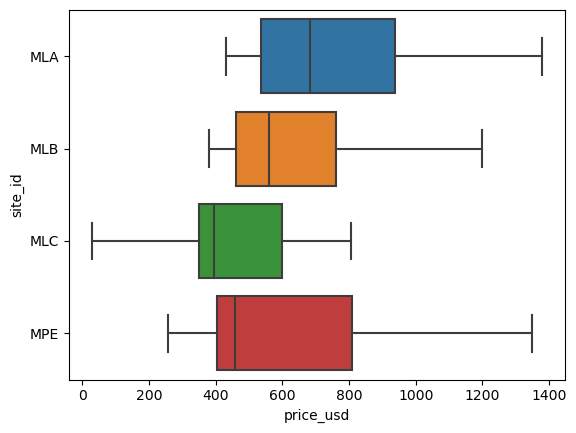

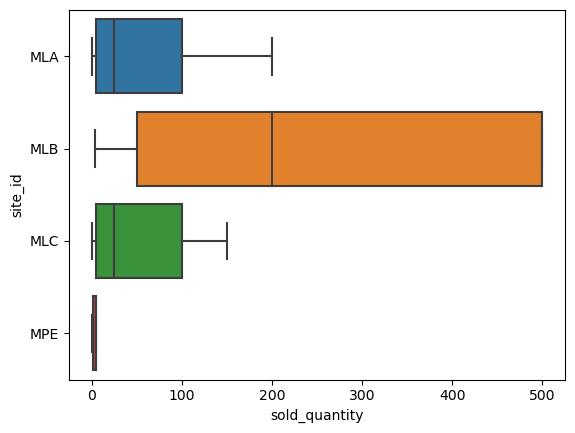

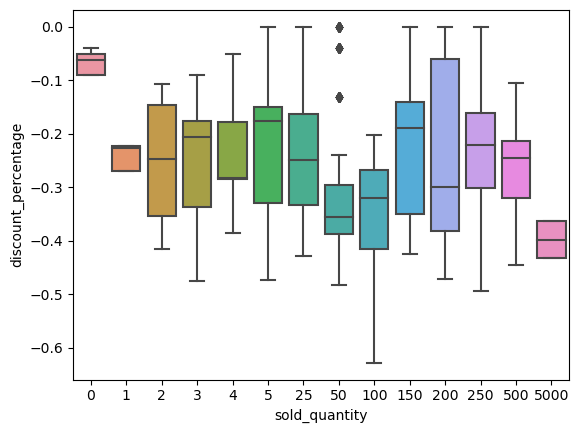

In [55]:

sns.boxplot(data=search_results, x='price_usd', y='site_id', showfliers=False)
plt.show()

sns.boxplot(data=search_results, x='sold_quantity', y='site_id', showfliers=False)
plt.show()

sns.boxplot(data=search_results[search_results['has_discount']==1], x='sold_quantity', y='discount_percentage')
plt.show()
# sns.scatterplot(data=pdf_grouped, x='has_discount', y='sold_quantity')


In [73]:
total_publications

,total,primary_results,offset,limit,site
0,907,907,0,50,MPE
